Kira Breeden

MSDS460 Spring 2020 Homework 2 

Use many explanatory variables for your predictions. 

Part 1: Employ at least two regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sea
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

Part 1

In [2]:
df_train = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/train_assign2.csv')

df_test = pd.read_csv('/Users/kirabreeden/Desktop/Grad_School/Northwestern_MSDS/Sping_2020/MSDS_422/Homeworks/test_HW2.csv')

Let's start by just taking a look at what we have as our dataframe  

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

So as we can see, there are about 79 or 80 possible explanatory variables in this dataframe and we want to predict SalePrice. Let's start by narrowing down our dataframe to useful features and our target value. 

So let's think about some of these features that may be useful for helping us predict the sale price of the house. 

So let's start by thinking about what house prices typically rely on. Because this is linear regression, we need to feed the features in to the model that we think might be meaningful and we do not want to feed in features that are not meaningful. 

Here's a preliminary list of features that may be useful:'Street', 'Neighborhood', 'Condition1', 'YearBuilt', 'OverallQual', 'OverallCond', 'ExterCond', 'ExterQual', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GrLivArea'

We will make a new dataframe with these features and see how things perform. 

In [5]:
df_use = df_train[['Street', 'Neighborhood', 'Condition1', 'YearBuilt', 'OverallQual', 'OverallCond', 'ExterCond', 'ExterQual', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GrLivArea']] 
df_use_predict = df_test[['Id','Street', 'Neighborhood', 'Condition1', 'YearBuilt', 'OverallQual', 'OverallCond', 'ExterCond', 'ExterQual', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GrLivArea']]


In [6]:
#now let's see how much missing data we are dealing with
df_use.info()
#df_use_predict.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
Street          1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
YearBuilt       1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
ExterCond       1460 non-null object
ExterQual       1460 non-null object
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
GarageFinish    1379 non-null object
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
GarageQual      1379 non-null object
GrLivArea       1460 non-null int64
dtypes: int64(10), object(7)
memory usage: 194.0+ KB


We can see that we seem to have some missing values only in GarageFinish, and GarageQual which could be because there are probably houses without garages. We still want to include these houses in our analyses so we will just fill these nans with outlier values. 

In [7]:
df_use.fillna(-999999, inplace = True)
df_use_predict.fillna(-999999, inplace = True)
df_use.info()
#df_use_predict.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 17 columns):
Street          1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
YearBuilt       1460 non-null int64
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
ExterCond       1460 non-null object
ExterQual       1460 non-null object
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
BedroomAbvGr    1460 non-null int64
KitchenAbvGr    1460 non-null int64
GarageFinish    1460 non-null object
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
GarageQual      1460 non-null object
GrLivArea       1460 non-null int64
dtypes: int64(10), object(7)
memory usage: 194.0+ KB


/Users/kirabreeden/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Alright now we have everything filled but we have a few features that are nonnumeric. Let's take a look at these and see if we think they are important enough to convert to numeric values and include in our featureset. 

It seems like many of the features that are nonumeric are 'quality' features which may actually be pretty important predictors, so let's go ahead and convert all of the text data into numeric values based on their categories so we can include them in our analyses. We will take a look at a correlation matrix after everthing is converted to numerics so we can take a look at what we think might be useful features. 

In [8]:
def make_numeric(df, feature):
    unique_values =  pd.unique(df[feature])
    feature_dict = {}
    count = 1
    for item in unique_values:
        if item == 'nan': 
            feature_dict[item] = -999999
        else:
            feature_dict[item] = count
            count = count+1 
    df[feature] = [feature_dict[i] for i in df[feature]]
    return df

df_use = make_numeric(df_use, 'Street')
df_use = make_numeric(df_use, 'Neighborhood')
df_use = make_numeric(df_use, 'Condition1')
df_use = make_numeric(df_use, 'ExterCond')
df_use = make_numeric(df_use, 'ExterQual')
df_use = make_numeric(df_use, 'GarageFinish')
df_use = make_numeric(df_use, 'GarageQual')

df_use_predict = make_numeric(df_use_predict, 'Street')
df_use_predict = make_numeric(df_use_predict, 'Neighborhood')
df_use_predict = make_numeric(df_use_predict, 'Condition1')
df_use_predict = make_numeric(df_use_predict, 'ExterCond')
df_use_predict = make_numeric(df_use_predict, 'ExterQual')
df_use_predict = make_numeric(df_use_predict, 'GarageFinish')
df_use_predict = make_numeric(df_use_predict, 'GarageQual')


/Users/kirabreeden/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Alright let's now go ahead and add our label column to our dataframe which we will designating as 'SalePrice'

In [9]:
df_use['SalePrice'] = df_train[['SalePrice']]
df_use.head()

/Users/kirabreeden/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Street,Neighborhood,Condition1,YearBuilt,OverallQual,OverallCond,ExterCond,ExterQual,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,GarageFinish,GarageCars,GarageArea,GarageQual,GrLivArea,SalePrice
0,1,1,1,2003,7,5,1,1,856,854,3,1,1,2,548,1,1710,208500
1,1,2,2,1976,6,8,1,2,1262,0,3,1,1,2,460,1,1262,181500
2,1,1,1,2001,7,5,1,1,920,866,3,1,1,2,608,1,1786,223500
3,1,3,1,1915,7,5,1,2,961,756,3,1,2,3,642,1,1717,140000
4,1,4,1,2000,8,5,1,1,1145,1053,4,1,1,3,836,1,2198,250000


Let's take a look at a preliminary correlation heatmap to get an idea for which things could be related strongly to saleprice and which things we may want to take a closer look at. This way we are not including any unnecessary features.

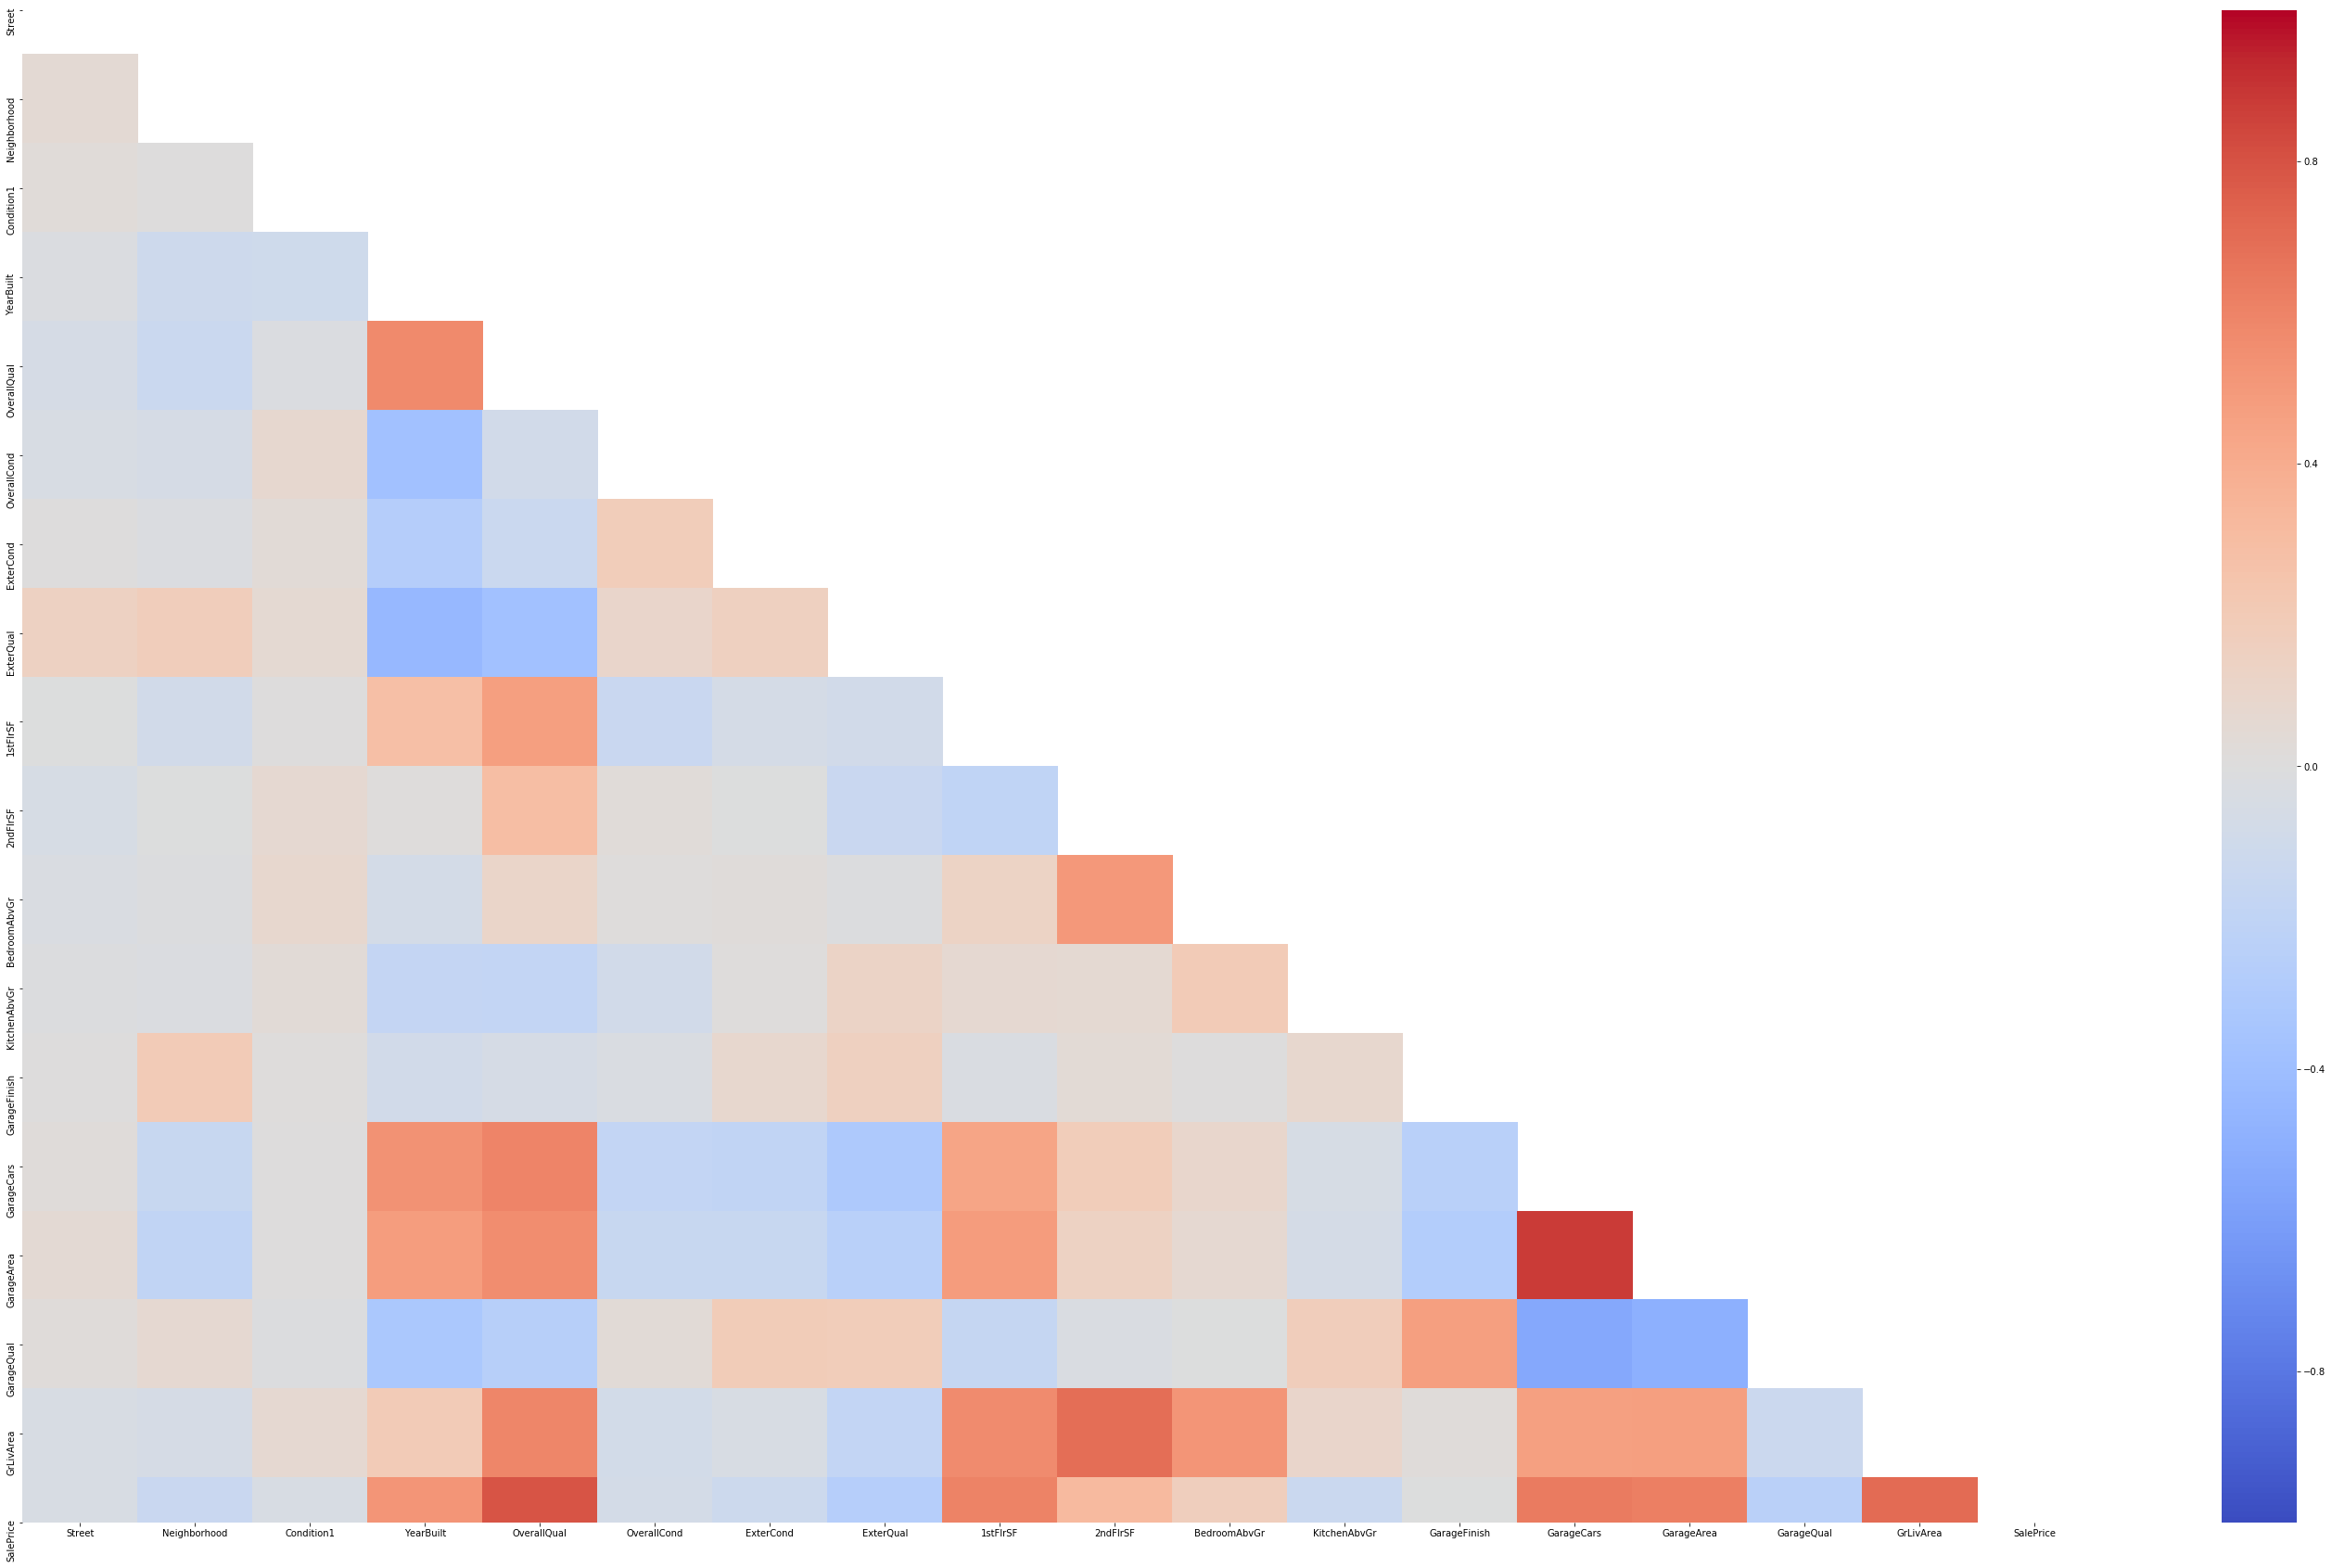

In [10]:
corr = df_use.corr()
fig, ax = plt.subplots(figsize=(50, 30))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sea.heatmap(corr,  vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = mask)

We can see here that the highest correlation seems to come from OverallQual, GrLivArea, and YearBuilt. We will use only these explanatory variables in future analyses. 

Alright now we are ready to go and begin our linear regression analyses! 

In [11]:
#BEST ONE SO FAR (BELOW)
df_use = df_train[['YearBuilt', 'OverallQual','GrLivArea']] 
df_use_predict = df_test[['Id','YearBuilt', 'OverallQual','GrLivArea']]

df_use['SalePrice'] = df_train[['SalePrice']]
df_use.head()

/Users/kirabreeden/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,YearBuilt,OverallQual,GrLivArea,SalePrice
0,2003,7,1710,208500
1,1976,6,1262,181500
2,2001,7,1786,223500
3,1915,7,1717,140000
4,2000,8,2198,250000


In [12]:
#Here we will separate our x and our y values (features and labels)
X = np.array(df_use.drop(['SalePrice'], 1))
y = np.array(df_use['SalePrice'])

#Now this is just so we can test and train on the training set provided by kaggle. 
#We will use their testing set at the end of the day but just for the sake of getting these models working, 
#we will use this for now. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_predict = np.array(df_use_predict.drop(['Id'], 1))

Part 2: Evaluate these methods within a cross-validation design using the root mean-squared error (RMSE) as an index of prediction error.  

In [13]:
modelLR = LinearRegression(n_jobs = -1)
modelLR.fit(X_train, y_train)
#this accuracy is the squared error
print('LinearRegression scores: ', modelLR.score(X_train,y_train), ' on our training data.')
print('LinearRegression scores: ', modelLR.score(X_test,y_test), ' on our test data.')

print("Let's look at our metrics...")
y_pred = modelLR.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))


LinearRegression scores:  0.7206631483984302  on our training data.
LinearRegression scores:  0.7778291328367916  on our test data.
Let's look at our metrics...
Root mean squared error =  42802.24711857162


In [14]:
modelR = Ridge()
modelR.fit(X_train, y_train)
print('Ridge scores: ', modelR.score(X_train,y_train), ' on our training data.')
print('Ridge scores: ', modelR.score(X_test,y_test), ' on our test data.')

print("Let's look at our metrics...")
y_pred = modelR.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

Ridge scores:  0.7206630472511568  on our training data.
Ridge scores:  0.7778451299921351  on our test data.
Let's look at our metrics...
Root mean squared error =  42800.70612777722


In [15]:
#Let's adjust our alpha a bit and see if anything changes 
modelR = Ridge(alpha = 10)
modelR.fit(X_train, y_train)
print('Adjusted Ridge scores: ', modelR.score(X_train,y_train), ' on our training data.')
print('Adjusted Ridge scores: ', modelR.score(X_test,y_test), ' on our test data.')

print("Let's look at our metrics...")
y_pred = modelR.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted Ridge scores:  0.7206532191782994  on our training data.
Adjusted Ridge scores:  0.7779813143859821  on our test data.
Let's look at our metrics...
Root mean squared error =  42787.58536707004


In [16]:
modelL = Lasso(alpha = 100)
modelL.fit(X_train, y_train)
print('Lasso scores: ', modelL.score(X_train,y_train), ' on our training data.')
print('Lasso scores: ', modelL.score(X_test,y_test), ' on our test data.')

print("Let's look at our metrics...")
y_pred = modelL.predict(X_test)
print("Root mean squared error = ", np.sqrt(mean_squared_error(y_test, y_pred)))

Lasso scores:  0.7206611678703673  on our training data.
Lasso scores:  0.7779008626520529  on our test data.
Let's look at our metrics...
Root mean squared error =  42795.33702012389


Of the modeling methods examined in your study, which would you recommend to management, and why?

We can see that regardless of the model type we use (out of many linear models) the accuracy tends to hang out around 77-85% accuracy on the test set depending on how the test and train sets are split up. This, of course, is not really the best accuracy out there. In order to confidently be able to make larger business decisions based on these models, I think we need a better algorithm here. For that reason, it is possible that linear models are not the ones we want to use for this dataset. 

We did go through and clean the data by filling the nan with outlier values, and making sure that any valuable text explanatory variables were converted to numeric data, however, even with this, our models do not perform super well. 

If I had to choose between these three algorithms for this particular instance I would actually choose to lasso regression. We can see from our RMSE tests that the error is lower in lasso regression and that our generalization from train to test is slightly better. 
In general, I would recommend that a company takes time to make sure they can find useful features to model from and then after they create a few different models. I would make sure to recommend that they evaluate the error of the model(s) before putting them into practice. 

That being said, after testing my model a few different time on Kaggle, it seems as though using lasso regression is actually best here (although still not performing up to what I would consider to be 'accurate'). 

In [17]:
forecast_set = modelL.predict(X_predict)

In [18]:
forecast_set

array([113218.95860726, 161317.64190584, 172062.89255773, ...,
       130829.53014054, 133108.05175252, 241933.52211439])

In [19]:
submission_id = np.array(df_use_predict['Id'])

In [20]:
submission_set = np.column_stack((submission_id,forecast_set))

In [21]:
submission_set

array([[  1461.        , 113218.95860726],
       [  1462.        , 161317.64190584],
       [  1463.        , 172062.89255773],
       ...,
       [  2917.        , 130829.53014054],
       [  2918.        , 133108.05175252],
       [  2919.        , 241933.52211439]])

In [23]:
np.savetxt('Breeden_Submission10.csv', submission_set, delimiter=',', fmt='%d')

Overall my best submission on kaggle was when I used fewer features and when I used the lasso model. This is also one of the models with a lower RMSE which also makes sense. 
The best submission I made was entitled Breeden_submission5 even though there still was a good bit of error. Maybe using linear models for this project in general is not the best decision. 